## 非線形回帰
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  noiseの値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 100. 誤差 = 31.101723
Generation: 200. 誤差 = 26.036562
Generation: 300. 誤差 = 21.643799
Generation: 400. 誤差 = 17.862257
Generation: 500. 誤差 = 14.632978
Generation: 600. 誤差 = 11.899235
Generation: 700. 誤差 = 9.6066475
Generation: 800. 誤差 = 7.703313
Generation: 900. 誤差 = 6.140023
Generation: 1000. 誤差 = 4.8705015
Generation: 1100. 誤差 = 3.8516865
Generation: 1200. 誤差 = 3.043991
Generation: 1300. 誤差 = 2.4115365
Generation: 1400. 誤差 = 1.9223504
Generation: 1500. 誤差 = 1.5484445
Generation: 1600. 誤差 = 1.2658018
Generation: 1700. 誤差 = 1.0542274
Generation: 1800. 誤差 = 0.897113
Generation: 1900. 誤差 = 0.78108615
Generation: 2000. 誤差 = 0.6955992
Generation: 2100. 誤差 = 0.63249445
Generation: 2200. 誤差 = 0.5855741
Generation: 2300. 誤差 = 0.55020314
Generation: 2400. 誤差 = 0.5229588
Generation: 2500. 誤差 = 0.50134355
Generation: 2600. 誤差 = 0.48355323
Generation: 2700. 誤差 = 0.46829727
Generation: 2800. 誤差 = 0.4546638
Generation: 2900. 誤差 = 0.44201893
Generation: 3000. 誤差 = 0.4299282
Generation: 3100

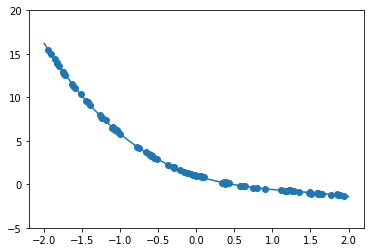

In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1  ## original - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.05  ## original 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)

plt.ylim(-5, 20)  ## 【レポート提出者変更】

linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

Generation: 100. 誤差 = 22.070871
Generation: 200. 誤差 = 18.729874
Generation: 300. 誤差 = 15.8387985
Generation: 400. 誤差 = 13.355256
Generation: 500. 誤差 = 11.238469
Generation: 600. 誤差 = 9.4493065
Generation: 700. 誤差 = 7.950401
Generation: 800. 誤差 = 6.706303
Generation: 900. 誤差 = 5.683626
Generation: 1000. 誤差 = 4.8512487
Generation: 1100. 誤差 = 4.1804914
Generation: 1200. 誤差 = 3.6452546
Generation: 1300. 誤差 = 3.222154
Generation: 1400. 誤差 = 2.8905609
Generation: 1500. 誤差 = 2.6325665
Generation: 1600. 誤差 = 2.4329057
Generation: 1700. 誤差 = 2.2787783
Generation: 1800. 誤差 = 2.1596403
Generation: 1900. 誤差 = 2.0669537
Generation: 2000. 誤差 = 1.9939259
Generation: 2100. 誤差 = 1.9352505
Generation: 2200. 誤差 = 1.8868598
Generation: 2300. 誤差 = 1.8457016
Generation: 2400. 誤差 = 1.8095404
Generation: 2500. 誤差 = 1.7767806
Generation: 2600. 誤差 = 1.7463194
Generation: 2700. 誤差 = 1.7174224
Generation: 2800. 誤差 = 1.689621
Generation: 2900. 誤差 = 1.6626343
Generation: 3000. 誤差 = 1.636305
Generation: 3100. 誤差 = 1

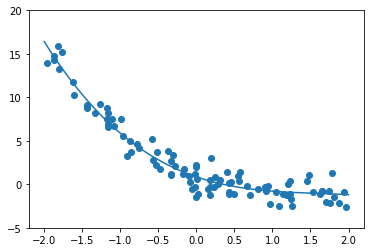

In [32]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1  ## original - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 1.05  ## original 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)

plt.ylim(-5, 20)  ## 【レポート提出者変更】

linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

Generation: 100. 誤差 = 40.04192
Generation: 200. 誤差 = 33.860756
Generation: 300. 誤差 = 28.520681
Generation: 400. 誤差 = 23.94432
Generation: 500. 誤差 = 20.05707
Generation: 600. 誤差 = 16.78716
Generation: 700. 誤差 = 14.065754
Generation: 800. 誤差 = 11.827143
Generation: 900. 誤差 = 10.008969
Generation: 1000. 誤差 = 8.552548
Generation: 1100. 誤差 = 7.40322
Generation: 1200. 誤差 = 6.510673
Generation: 1300. 誤差 = 5.8292894
Generation: 1400. 誤差 = 5.3183923
Generation: 1500. 誤差 = 4.942426
Generation: 1600. 誤差 = 4.670964
Generation: 1700. 誤差 = 4.478595
Generation: 1800. 誤差 = 4.3446436
Generation: 1900. 誤差 = 4.252744
Generation: 2000. 誤差 = 4.190331
Generation: 2100. 誤差 = 4.1480355
Generation: 2200. 誤差 = 4.1190968
Generation: 2300. 誤差 = 4.09879
Generation: 2400. 誤差 = 4.08391
Generation: 2500. 誤差 = 4.0723553
Generation: 2600. 誤差 = 4.0627794
Generation: 2700. 誤差 = 4.0543437
Generation: 2800. 誤差 = 4.046533
Generation: 2900. 誤差 = 4.039037
Generation: 3000. 誤差 = 4.0316663
Generation: 3100. 誤差 = 4.0243053
Gener

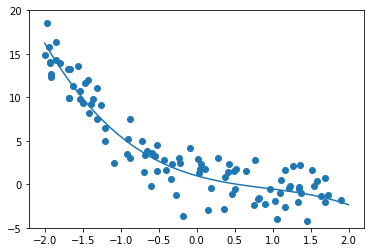

In [33]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1  ## original - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 2.05  ## original 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)

plt.ylim(-5, 20)  ## 【レポート提出者変更】

linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

----
### [try]
-  dの数値を変更しよう
----

Generation: 100. 誤差 = 35.008488
Generation: 200. 誤差 = 29.283262
Generation: 300. 誤差 = 24.331533
Generation: 400. 誤差 = 20.08082
Generation: 500. 誤差 = 16.461327
Generation: 600. 誤差 = 13.405952
Generation: 700. 誤差 = 10.850502
Generation: 800. 誤差 = 8.733919
Generation: 900. 誤差 = 6.998557
Generation: 1000. 誤差 = 5.590565
Generation: 1100. 誤差 = 4.4602146
Generation: 1200. 誤差 = 3.562232
Generation: 1300. 誤差 = 2.8560576
Generation: 1400. 誤差 = 2.3059888
Generation: 1500. 誤差 = 1.8812132
Generation: 1600. 誤差 = 1.5556302
Generation: 1700. 誤差 = 1.307594
Generation: 1800. 誤差 = 1.1194817
Generation: 1900. 誤差 = 0.9771985
Generation: 2000. 誤差 = 0.8696367
Generation: 2100. 誤差 = 0.78815687
Generation: 2200. 誤差 = 0.7260976
Generation: 2300. 誤差 = 0.6783557
Generation: 2400. 誤差 = 0.64104414
Generation: 2500. 誤差 = 0.61121994
Generation: 2600. 誤差 = 0.58666813
Generation: 2700. 誤差 = 0.5657382
Generation: 2800. 誤差 = 0.54721814
Generation: 2900. 誤差 = 0.53023463
Generation: 3000. 誤差 = 0.51417506
Generation: 3100. 

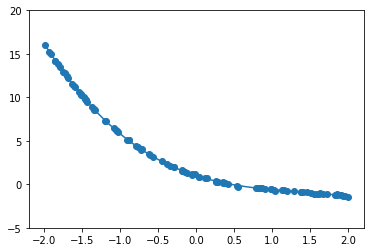

In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1  ## original - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.05  ## original 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)

plt.ylim(-5, 20)  ## 【レポート提出者変更】

linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

Generation: 100. 誤差 = 112.214455
Generation: 200. 誤差 = 102.328064
Generation: 300. 誤差 = 93.248634
Generation: 400. 誤差 = 84.92736
Generation: 500. 誤差 = 77.31718
Generation: 600. 誤差 = 70.37266
Generation: 700. 誤差 = 64.049934
Generation: 800. 誤差 = 58.306606
Generation: 900. 誤差 = 53.10163
Generation: 1000. 誤差 = 48.395332
Generation: 1100. 誤差 = 44.149345
Generation: 1200. 誤差 = 40.32663
Generation: 1300. 誤差 = 36.89148
Generation: 1400. 誤差 = 33.809586
Generation: 1500. 誤差 = 31.048094
Generation: 1600. 誤差 = 28.575716
Generation: 1700. 誤差 = 26.362871
Generation: 1800. 誤差 = 24.381725
Generation: 1900. 誤差 = 22.606426
Generation: 2000. 誤差 = 21.013124
Generation: 2100. 誤差 = 19.580095
Generation: 2200. 誤差 = 18.287836
Generation: 2300. 誤差 = 17.119072
Generation: 2400. 誤差 = 16.058592
Generation: 2500. 誤差 = 15.093398
Generation: 2600. 誤差 = 14.212385
Generation: 2700. 誤差 = 13.40621
Generation: 2800. 誤差 = 12.667061
Generation: 2900. 誤差 = 11.98843
Generation: 3000. 誤差 = 11.364878
Generation: 3100. 誤差 = 10

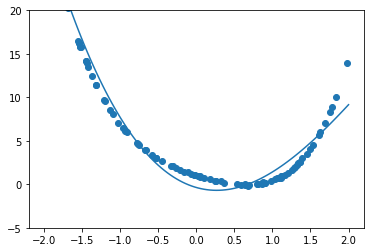

In [40]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1 + x**4  ## original - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.05  ## original 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)

plt.ylim(-5, 20)  ## 【レポート提出者変更】

linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

Generation: 100. 誤差 = 33.626587
Generation: 200. 誤差 = 29.981499
Generation: 300. 誤差 = 26.845093
Generation: 400. 誤差 = 24.165552
Generation: 500. 誤差 = 21.892607
Generation: 600. 誤差 = 19.977633
Generation: 700. 誤差 = 18.373861
Generation: 800. 誤差 = 17.036728
Generation: 900. 誤差 = 15.924297
Generation: 1000. 誤差 = 14.997815
Generation: 1100. 誤差 = 14.222256
Generation: 1200. 誤差 = 13.566847
Generation: 1300. 誤差 = 13.005381
Generation: 1400. 誤差 = 12.516293
Generation: 1500. 誤差 = 12.082393
Generation: 1600. 誤差 = 11.690369
Generation: 1700. 誤差 = 11.330125
Generation: 1800. 誤差 = 10.994077
Generation: 1900. 誤差 = 10.676575
Generation: 2000. 誤差 = 10.373404
Generation: 2100. 誤差 = 10.08144
Generation: 2200. 誤差 = 9.798385
Generation: 2300. 誤差 = 9.52259
Generation: 2400. 誤差 = 9.2529125
Generation: 2500. 誤差 = 8.988607
Generation: 2600. 誤差 = 8.729227
Generation: 2700. 誤差 = 8.4745455
Generation: 2800. 誤差 = 8.224492
Generation: 2900. 誤差 = 7.9790955
Generation: 3000. 誤差 = 7.7384453
Generation: 3100. 誤差 = 7.5

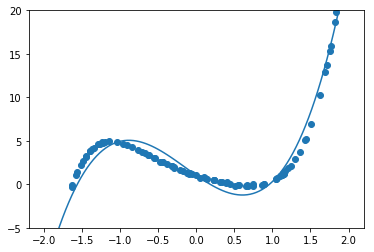

In [39]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1 + x**5  ## original - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.05  ## original 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)

plt.ylim(-5, 20)  ## 【レポート提出者変更】

linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  次の式をモデルとして回帰を行おう
$$ y=30x^{2} +0.5x+0.2 $$<br>
-  誤差が収束するようiters_numやlearning_rateを調整しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 100. 誤差 = 2844.4631
Generation: 200. 誤差 = 2816.0752
Generation: 300. 誤差 = 2788.2969
Generation: 400. 誤差 = 2761.06
Generation: 500. 誤差 = 2734.301
Generation: 600. 誤差 = 2707.959
Generation: 700. 誤差 = 2681.98
Generation: 800. 誤差 = 2656.316
Generation: 900. 誤差 = 2630.926
Generation: 1000. 誤差 = 2605.777
Generation: 1100. 誤差 = 2580.8435
Generation: 1200. 誤差 = 2556.107
Generation: 1300. 誤差 = 2531.5537
Generation: 1400. 誤差 = 2507.1753
Generation: 1500. 誤差 = 2482.965
Generation: 1600. 誤差 = 2458.919
Generation: 1700. 誤差 = 2435.0342
Generation: 1800. 誤差 = 2411.3083
Generation: 1900. 誤差 = 2387.7397
Generation: 2000. 誤差 = 2364.3262
Generation: 2100. 誤差 = 2341.0667
Generation: 2200. 誤差 = 2317.9595
Generation: 2300. 誤差 = 2295.003
Generation: 2400. 誤差 = 2272.1963
Generation: 2500. 誤差 = 2249.5376
Generation: 2600. 誤差 = 2227.026
Generation: 2700. 誤差 = 2204.66
Generation: 2800. 誤差 = 2182.4385
Generation: 2900. 誤差 = 2160.3604
Generation: 3000. 誤差 = 2138.4248
Generation: 3100. 誤差 = 2116.6304
Ge

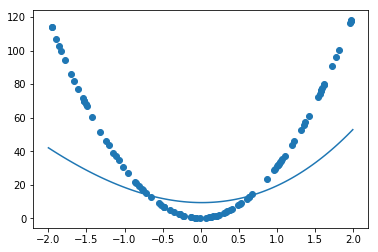

In [47]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 10000  ## original 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
## d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1  ## original - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1
d = 30 * x ** 2 + 0.5 * x + 0.2   ## 【レポート提出者変更】

#  ノイズを加える
noise = 0.05  ## original 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)  ## 0.001
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)

#plt.ylim(-5, 20)  ## 【レポート提出者変更】

linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

Generation: 100. 誤差 = 2897.2
Generation: 200. 誤差 = 2864.6414
Generation: 300. 誤差 = 2832.8157
Generation: 400. 誤差 = 2801.6868
Generation: 500. 誤差 = 2771.2195
Generation: 600. 誤差 = 2741.3774
Generation: 700. 誤差 = 2712.1287
Generation: 800. 誤差 = 2683.4382
Generation: 900. 誤差 = 2655.2742
Generation: 1000. 誤差 = 2627.604
Generation: 1100. 誤差 = 2600.3972
Generation: 1200. 誤差 = 2573.6226
Generation: 1300. 誤差 = 2547.2493
Generation: 1400. 誤差 = 2521.2485
Generation: 1500. 誤差 = 2495.5913
Generation: 1600. 誤差 = 2470.25
Generation: 1700. 誤差 = 2445.1987
Generation: 1800. 誤差 = 2420.4126
Generation: 1900. 誤差 = 2395.8691
Generation: 2000. 誤差 = 2371.5483
Generation: 2100. 誤差 = 2347.4333
Generation: 2200. 誤差 = 2323.5088
Generation: 2300. 誤差 = 2299.7637
Generation: 2400. 誤差 = 2276.189
Generation: 2500. 誤差 = 2252.7778
Generation: 2600. 誤差 = 2229.5256
Generation: 2700. 誤差 = 2206.4294
Generation: 2800. 誤差 = 2183.4866
Generation: 2900. 誤差 = 2160.6963
Generation: 3000. 誤差 = 2138.057
Generation: 3100. 誤差 = 2115

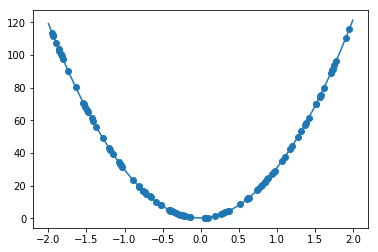

In [49]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 40000  ## original 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
## d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1  ## original - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1
d = 30 * x ** 2 + 0.5 * x + 0.2   ## 【レポート提出者変更】

#  ノイズを加える
noise = 0.05  ## original 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)  ## 0.001
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)

#plt.ylim(-5, 20)  ## 【レポート提出者変更】

linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

Generation: 100. 誤差 = 492.54364
Generation: 200. 誤差 = 144.22166
Generation: 300. 誤差 = 77.70496
Generation: 400. 誤差 = 39.8835
Generation: 500. 誤差 = 18.347055
Generation: 600. 誤差 = 7.5733705
Generation: 700. 誤差 = 2.8063097
Generation: 800. 誤差 = 0.9333234
Generation: 900. 誤差 = 0.27907524
Generation: 1000. 誤差 = 0.07598844
Generation: 1100. 誤差 = 0.020069445
Generation: 1200. 誤差 = 0.0064487173
Generation: 1300. 誤差 = 0.0035244552
Generation: 1400. 誤差 = 0.0029737938
Generation: 1500. 誤差 = 0.0028833395
Generation: 1600. 誤差 = 0.0028704787
Generation: 1700. 誤差 = 0.0028688596
Generation: 1800. 誤差 = 0.0028687224
Generation: 1900. 誤差 = 0.0028687112
Generation: 2000. 誤差 = 0.0028686712
[[-3.7100781e-03]
 [ 3.0005089e+01]
 [ 5.1104361e-01]
 [ 1.9231768e-01]]


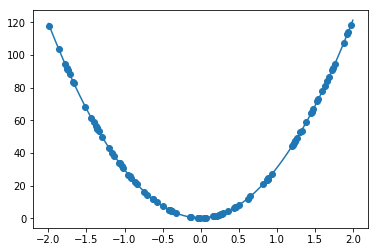

In [51]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 2000  ## original 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
## d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1  ## original - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1
d = 30 * x ** 2 + 0.5 * x + 0.2   ## 【レポート提出者変更】

#  ノイズを加える
noise = 0.05  ## original 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.154)  ## 0.001
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)

#plt.ylim(-5, 20)  ## 【レポート提出者変更】

linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()